In [1]:
#8.3 하이퍼파라미터를 이용한 성능 최적화
#배치 정규화(Batch Normalization)

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df.astype(float)
df['label'] = iris.target
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [4]:
datalist = ['this','is','deep learning', 'book']
b = list(enumerate(datalist))
c = dict(enumerate(datalist))
print(b)
print(c)

[(0, 'this'), (1, 'is'), (2, 'deep learning'), (3, 'book')]
{0: 'this', 1: 'is', 2: 'deep learning', 3: 'book'}


In [5]:
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
df.drop(['label'], axis=1, inplace=True)

In [6]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
X = np.asarray(X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
y = np.asarray(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [8]:
# 배치 정규화가 적용되지 않은 모델 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

model1 = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
]);
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 37,763
Trainable params: 37,763
Non-trainable params: 0
____________________________________________________

In [9]:
model1.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history1 = model1.fit(
    X_train, 
    y_train, 
    epochs=1000, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/1000
3/3 - 0s - loss: 1.2154 - accuracy: 0.2667 - val_loss: 0.9972 - val_accuracy: 0.6333
Epoch 2/1000
3/3 - 0s - loss: 0.9531 - accuracy: 0.7556 - val_loss: 0.8798 - val_accuracy: 0.8000
Epoch 3/1000
3/3 - 0s - loss: 0.8276 - accuracy: 0.8000 - val_loss: 0.7616 - val_accuracy: 0.7667
Epoch 4/1000
3/3 - 0s - loss: 0.6984 - accuracy: 0.8889 - val_loss: 0.6390 - val_accuracy: 0.9667
Epoch 5/1000
3/3 - 0s - loss: 0.5780 - accuracy: 0.9333 - val_loss: 0.5505 - val_accuracy: 0.7000
Epoch 6/1000
3/3 - 0s - loss: 0.4885 - accuracy: 0.7444 - val_loss: 0.4653 - val_accuracy: 0.8667
Epoch 7/1000
3/3 - 0s - loss: 0.4197 - accuracy: 0.9000 - val_loss: 0.4214 - val_accuracy: 0.9667
Epoch 8/1000
3/3 - 0s - loss: 0.3817 - accuracy: 0.9444 - val_loss: 0.3823 - val_accuracy: 0.8667
Epoch 9/1000
3/3 - 0s - loss: 0.3365 - accuracy: 0.9333 - val_loss: 0.3505 - val_accuracy: 0.8667
Epoch 10/1000
3/3 - 0s - loss: 0.3054 - accuracy: 0.9333 - val_loss: 0.3118 - val_accuracy: 0.9333
Epoch 11/1000
3/3 -

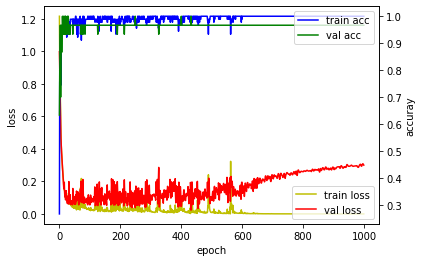

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(history1.history['loss'], 'y', label='train loss')
loss_ax.plot(history1.history['val_loss'], 'r', label='val loss')
acc_ax.plot(history1.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history1.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper right')
plt.show()

In [11]:
loss_and_metrics = model1.evaluate(X_test, y_test)
print('## 손실과 정확도 평가  ##')
print(loss_and_metrics)

1/1 [==============================] - 0s 1ms/step - loss: 0.5317 - accuracy: 0.9333
## 손실과 정확도 평가  ##
[0.5316773653030396, 0.9333333373069763]


In [12]:
# 배치 정규화가 적용된 모델 생성
from tensorflow.keras.initializers import RandomNormal, Constant
model2 = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    BatchNormalization(),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
    ),
    Dense(3, activation='softmax')
]);
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                320       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [13]:
model2.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

history2 = model2.fit(
    X_train, 
    y_train, 
    epochs=1000, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/1000
3/3 - 0s - loss: 0.7546 - accuracy: 0.6889 - val_loss: 1.0772 - val_accuracy: 0.3333
Epoch 2/1000
3/3 - 0s - loss: 0.2344 - accuracy: 0.9667 - val_loss: 1.0729 - val_accuracy: 0.3333
Epoch 3/1000
3/3 - 0s - loss: 0.1445 - accuracy: 0.9889 - val_loss: 1.0825 - val_accuracy: 0.3333
Epoch 4/1000
3/3 - 0s - loss: 0.1030 - accuracy: 0.9667 - val_loss: 1.1015 - val_accuracy: 0.3333
Epoch 5/1000
3/3 - 0s - loss: 0.0931 - accuracy: 1.0000 - val_loss: 1.1288 - val_accuracy: 0.3333
Epoch 6/1000
3/3 - 0s - loss: 0.0577 - accuracy: 0.9778 - val_loss: 1.1510 - val_accuracy: 0.3333
Epoch 7/1000
3/3 - 0s - loss: 0.0811 - accuracy: 0.9778 - val_loss: 1.1679 - val_accuracy: 0.3333
Epoch 8/1000
3/3 - 0s - loss: 0.0483 - accuracy: 1.0000 - val_loss: 1.1795 - val_accuracy: 0.3333
Epoch 9/1000
3/3 - 0s - loss: 0.0825 - accuracy: 0.9667 - val_loss: 1.1924 - val_accuracy: 0.3333
Epoch 10/1000
3/3 - 0s - loss: 0.0378 - accuracy: 1.0000 - val_loss: 1.2020 - val_accuracy: 0.3333
Epoch 11/1000
3/3 -

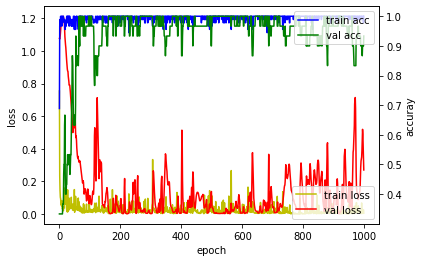

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history2.history['loss'], 'y', label='train loss')
loss_ax.plot(history2.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history2.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history2.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper right')
plt.show()

In [15]:
loss_and_metrics = model2.evaluate(X_test, y_test)
print('## 손실과 정확도 평가  ##')
print(loss_and_metrics)

1/1 [==============================] - 0s 2ms/step - loss: 0.0778 - accuracy: 0.9667
## 손실과 정확도 평가  ##
[0.07776810228824615, 0.9666666388511658]


In [16]:
#8.3.2 드롭아웃을 이용한 성능 최적화

In [17]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [18]:
#conda install -c conda-forge ipywidgets
#설치후 커널 재시작이 필요합니다

(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True)
padded_shapes = ([None],())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)

Shuffling and writing examples to C:\Users\jyseo\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incompleteY4MKLH\imdb_reviews-train.tfrecord


Shuffling and writing examples to C:\Users\jyseo\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incompleteY4MKLH\imdb_reviews-test.tfrecord


Shuffling and writing examples to C:\Users\jyseo\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incompleteY4MKLH\imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to C:\Users\jyseo\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0. Subsequent calls will reuse this data.


In [19]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[1052,    2, 2474, ...,    0,    0,    0],
       [  12,  210,   15, ...,    0,    0,    0],
       [3853, 1087, 1842, ...,    0,    0,    0],
       ...,
       [8002, 8010, 7961, ...,    0,    0,    0],
       [  12,   31, 6261, ...,    0,    0,    0],
       [  12,   52,   14, ...,    0,    0,    0]], dtype=int64)

In [20]:
#드롭아웃이 적용되지 않은 모델을 생성
encoder = info.features['text'].encoder
model = tf.keras.Sequential([
tf.keras.layers.Embedding(encoder.vocab_size, 64),
tf.keras.layers.LSTM(64),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
history = model.fit(train_batches, epochs=5, validation_data=test_batches, validation_steps=30)

Epoch 1/5
2500/2500 [==============================] - 612s 245ms/step - loss: 0.6930 - accuracy: 0.5056 - val_loss: 0.6937 - val_accuracy: 0.4900
Epoch 2/5
2500/2500 [==============================] - 598s 239ms/step - loss: 0.6881 - accuracy: 0.5210 - val_loss: 0.6776 - val_accuracy: 0.5533
Epoch 3/5
2500/2500 [==============================] - 593s 237ms/step - loss: 0.6675 - accuracy: 0.5640 - val_loss: 0.6696 - val_accuracy: 0.5500
Epoch 4/5
2500/2500 [==============================] - 592s 237ms/step - loss: 0.6459 - accuracy: 0.6447 - val_loss: 0.6386 - val_accuracy: 0.6633
Epoch 5/5
2500/2500 [==============================] - 584s 234ms/step - loss: 0.6407 - accuracy: 0.6562 - val_loss: 0.6557 - val_accuracy: 0.6467


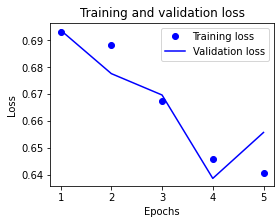

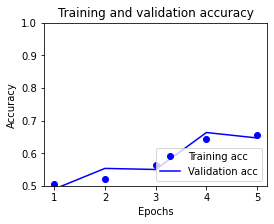

In [22]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(4,3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [23]:
#성능 향상을 위해 LSTM 대신 Bidirectional RNN로 바꾸고 드롭아웃을 적용
model = tf.keras.Sequential([
tf.keras.layers.Embedding(encoder.vocab_size, 64),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
________________________________________________

In [24]:
model.compile(loss='binary_crossentropy',          
              optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
history = model.fit(train_batches, epochs=5, validation_data=test_batches, validation_steps=30)

Epoch 1/5
2500/2500 [==============================] - 1665s 666ms/step - loss: 0.5494 - accuracy: 0.7013 - val_loss: 0.3577 - val_accuracy: 0.8600
Epoch 2/5
2500/2500 [==============================] - 1898s 759ms/step - loss: 0.3166 - accuracy: 0.8791 - val_loss: 0.4395 - val_accuracy: 0.8433
Epoch 3/5
2500/2500 [==============================] - 1889s 756ms/step - loss: 0.2472 - accuracy: 0.9105 - val_loss: 0.4011 - val_accuracy: 0.8267
Epoch 4/5
2500/2500 [==============================] - 1730s 692ms/step - loss: 0.2044 - accuracy: 0.9292 - val_loss: 0.3639 - val_accuracy: 0.8700
Epoch 5/5
2500/2500 [==============================] - 1802s 721ms/step - loss: 0.1698 - accuracy: 0.9428 - val_loss: 0.3939 - val_accuracy: 0.8600


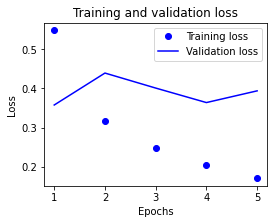

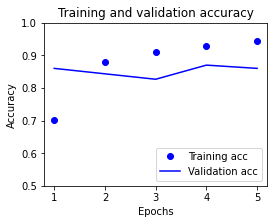

In [25]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(4,3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [26]:
#드롭아웃은 제거하고, Bidirectional RNN만 적용했을 때
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='binary_crossentropy',          
              optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
history = model.fit(train_batches, epochs=5, validation_data=test_batches, validation_steps=30)

Epoch 1/5
2500/2500 [==============================] - 1028s 411ms/step - loss: 0.4898 - accuracy: 0.7400 - val_loss: 0.3076 - val_accuracy: 0.8900
Epoch 2/5
2500/2500 [==============================] - 1044s 418ms/step - loss: 0.2935 - accuracy: 0.8872 - val_loss: 0.4201 - val_accuracy: 0.8267
Epoch 3/5
2500/2500 [==============================] - 1064s 426ms/step - loss: 0.2289 - accuracy: 0.9179 - val_loss: 0.4016 - val_accuracy: 0.8400
Epoch 4/5
2500/2500 [==============================] - 1136s 454ms/step - loss: 0.1936 - accuracy: 0.9317 - val_loss: 0.4382 - val_accuracy: 0.8367
Epoch 5/5
2500/2500 [==============================] - 1196s 478ms/step - loss: 0.1723 - accuracy: 0.9409 - val_loss: 0.5154 - val_accuracy: 0.8367


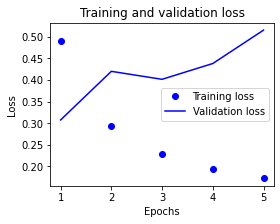

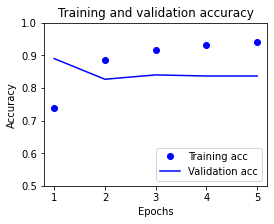

In [28]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(4,3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [29]:
#8.3.3 조기 종료를 이용한 성능 최적화
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.datasets import imdb
import tensorflow as tf
import numpy as np

In [30]:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 300
np.random.seed(7)

In [31]:
import os
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,verbose=1)

In [32]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [33]:
# 조기종료를 적용하지 않은 모델
model = Sequential()
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
dropout_10 (Dropout)         (None, 400, 50)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 250)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 250)               62750     
_________________________________________________________________
dropout_11 (Dropout)         (None, 250)               0         
_________________________________________________________________
activation_10 (Activation)   (None, 250)              

In [34]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          callbacks=[cp_callback])

Epoch 1/300
624/625 [============================>.] - ETA: 0s - loss: 0.4360 - accuracy: 0.7764
Epoch 00001: saving model to training_1\cp.ckpt
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets
625/625 [==============================] - 36s 57ms/step - loss: 0.4357 - accuracy: 0.7766 - val_loss: 0.2819 - val_accuracy: 0.8840
Epoch 2/300
625/625 [==============================] - ETA: 0s - loss: 0.2401 - accuracy: 0.9021
Epoch 00002: saving model to training_1\cp.ckpt
INFO:tensorflow:Assets written to: training_1\cp.ckpt\assets
625/625 [==============================] - 36s 58ms/step - loss: 0.2401 - accuracy: 0.9021 - val_loss: 0.2758 - val_accuracy: 0.8854
Epoch 3/300
625/625 [==============================] - ETA: 0s - loss: 0.1609 - accuracy

In [35]:
from tensorflow.keras.models import load_model
model = load_model(checkpoint_path)
scores = model.evaluate(x_test, y_test, verbose=1)
print(f'Score: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

782/782 [==============================] - 9s 12ms/step - loss: 1.9404 - accuracy: 0.8711
Score: loss of 1.9403566122055054; accuracy of 87.11199760437012%


In [36]:
#조기 종료를 적용한 모델
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2, 
          callbacks=keras_callbacks)


Epoch 1/300
625/625 [==============================] - 34s 54ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 2.8124 - val_accuracy: 0.8792
Epoch 2/300
625/625 [==============================] - 32s 52ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 2.9206 - val_accuracy: 0.8786
Epoch 3/300
625/625 [==============================] - 35s 56ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 2.5639 - val_accuracy: 0.8774
Epoch 4/300
625/625 [==============================] - 38s 60ms/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 2.4007 - val_accuracy: 0.8788
Epoch 5/300
625/625 [==============================] - 36s 57ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 1.9531 - val_accuracy: 0.8790
Epoch 6/300
625/625 [==============================] - 34s 55ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 2.1862 - val_accuracy: 0.8786
Epoch 7/300
625/625 [==============================] - 37s 59ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 2.0933 - val_ac

In [37]:
model = load_model(checkpoint_path)
scores = model.evaluate(x_test, y_test, verbose=1)
print(f'Score: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

782/782 [==============================] - 13s 16ms/step - loss: 1.5000 - accuracy: 0.8696
Score: loss of 1.5000197887420654; accuracy of 86.9599997997284%
